# Ramachandran plot and DSSP with MDAnalysis

## Ramachandran plot with MDA

In [1]:
import pytraj as pyt
import numpy as np

In [2]:
data_dir = './dm_sources_1L2Y/'

In [3]:
# Cargamos el archivo de topología y seleccionamos los residuos de la proteína
f_topology = F'{data_dir}/4-run_dm_2/tc5b_wb.psf'
top_psf = pyt.load_topology(f_topology)[':1-20']
top_psf

<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>

In [4]:
# Cargamos el archivo con la trayectoria total
f_full_traj = F'{data_dir}/5-traj_analysis/tc5b_PROT_FULL_TRAJ.dcd'
full_traj = pyt.load(filename = f_full_traj, top = top_psf)
full_traj

pytraj.Trajectory, 5348 frames: 
Size: 0.036339 (GB)
<Topology: 304 atoms, 20 residues, 1 mols, non-PBC>
           

In [6]:
# Cargamos la estructura NMR
nmr_strc = pyt.load(filename = F'{data_dir}/5-traj_analysis/1l2y_Hs.pdb',
                  top = F'{data_dir}/5-traj_analysis/1l2y_Hs.psf')

In [7]:
# Definimos frames claves para evaluarlos
first_frame = full_traj[0]
last_frame = full_traj[-1]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Carga de la gráfica de referencia
a = np.loadtxt('https://raw.githubusercontent.com/jRicciL/MD_namd_python/master/dm_sources_1L2Y/0-inputs/ramchandran_references/pref_general.data.txt')

a= a.T
#a = np.compress( a[2] > 0.03, a, axis=1)
#len(a[1])

In [11]:
a[2][a[2]  > 0.001] = 3
a.T

array([[-179., -179.,    3.],
       [-179., -177.,    3.],
       [-179., -175.,    3.],
       ...,
       [ 179.,  175.,    3.],
       [ 179.,  177.,    3.],
       [ 179.,  179.,    3.]])

In [12]:
10**(-10)

1e-10

In [13]:
a = np.loadtxt('https://raw.githubusercontent.com/jRicciL/MD_namd_python/master/dm_sources_1L2Y/0-inputs/ramchandran_references/pref_general.data.txt')

a= a.T
a[2].max()

0.9999630696506389

In [418]:
a = np.loadtxt('https://raw.githubusercontent.com/jRicciL/MD_namd_python/master/dm_sources_1L2Y/0-inputs/ramchandran_references/pref_general.data.txt')

a= a.T

a[2][(a[2]  > 0.1)] = 10
a[2][(a[2]  > 0.01) & (a[2]  < 0.1)] = 1
a[2][(a[2]  > 0.001) & (a[2]  < 0.01)] = 0.1
a[2][(a[2]  > 0.0001) & (a[2]  < 0.001)] = 0.01
a[2][(a[2]  < 0.0001)] = 0.001

In [14]:
a = np.loadtxt('https://raw.githubusercontent.com/jRicciL/MD_namd_python/master/dm_sources_1L2Y/0-inputs/ramchandran_references/pref_general.data.txt')

a= a.T
for i in range(0, 5):
    print(10**(-i))
    a[2][(a[2]  > 10**(-i-1)) & (a[2]  < 10**(-i))] = 10 * (2**(-i+1)) / 2
    print(10 * (2**(-i+1)) / 2)
a[2][(a[2]  < 0.0001)] = 0.0

a[2].max()

1
10.0
0.1
5.0
0.01
2.5
0.001
1.25
0.0001
0.625


10.0

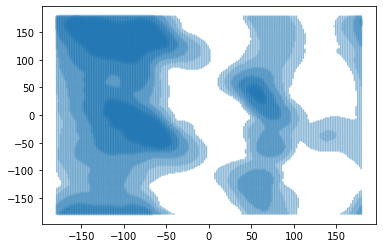

In [15]:
fig, ax = plt.subplots()
ax.scatter(a[0], a[1], s=a[2], alpha = 0.3)

plt.show()

In [83]:

path = './dm_sources_1L2Y/0-inputs/ramchandran_references'
files = ['general', 'glycine', 
         'proline', 'preproline']

for file in files:
    a = np.loadtxt(F'{path}/pref_{file}.data.txt')
    a = a.T
    for i in range(0, 6):
        a[2][(a[2]  > 10**(-i-1)) & (a[2]  < 10**(-i))] = 10 * (2**(-i+1)) / 2
    a[2][(a[2]  < 0.001)] = 0
    a = np.compress(a[2] != 0, a, axis=1)
    # Guarda el archivo
    save_path = F'{path}/pref_{file}'
    np.save(save_path, a)

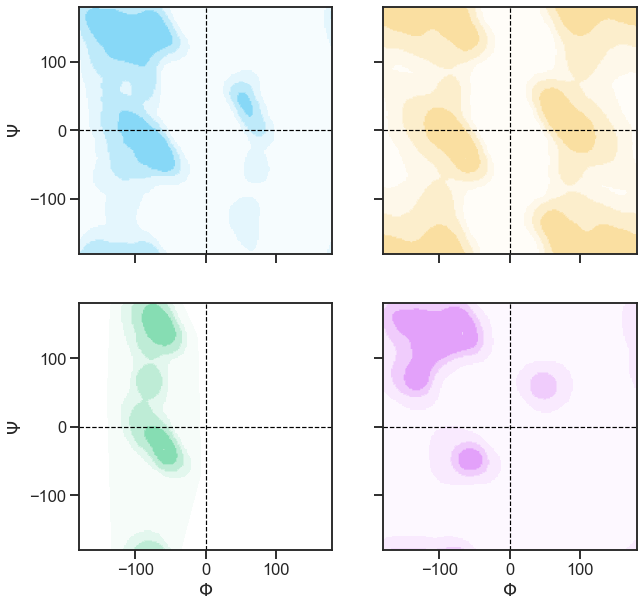

In [160]:
from  matplotlib import pyplot as plt
import seaborn as sns
import pylab
sns.set( context = 'talk', style = 'ticks', palette = "Spectral")
pylab.rcParams['figure.figsize'] = (10, 10)

colors = {'general': "#7ED5F6", 'glycine': "#FADD9A",
        'proline': '#7DDAAD', 'preproline': '#E19AFA'}

path = './dm_sources_1L2Y/0-inputs/ramchandran_references'
data = { i: np.load(F'{path}/pref_{i}.npy') for i in colors.keys()}

fig, axs = plt.subplots(2, 2, figsize = plt.figaspect(1))
for ax, plot in zip(axs.flat, data.keys()):
    x = data[plot]
    my_cmap = sns.blend_palette(['white', colors[plot]], as_cmap=True)
    ax.set_xlim(-180, 180)
    ax.set_ylim(-180, 180)
    ax.axhline(y=.0, linestyle = '--', c = 'black', lw = 1.2)
    ax.axvline(x=.0, linestyle = '--', c = 'black', lw = 1.2)
    ax.tricontourf(x[0], x[1], x[2], cmap = my_cmap)
    ax.set(xlabel=r'$\Phi$', ylabel=r'$\Psi$')
    ax.label_outer()

(32400, 3)
1.0


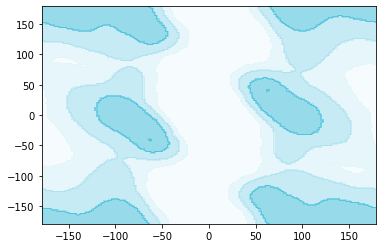

In [78]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

a = np.loadtxt('./dm_sources_1L2Y/0-inputs/ramchandran_references/pref_glycine.data.txt')
print(a.shape)
a= a.T
for i in range(0, 5):
    a[2][(a[2]  > 10**(-i-1)) & (a[2]  < 10**(-i))] = 10 * (2**(-i+1)) / 2
a[2][(a[2]  < 0.001)] = 0
a = np.compress(a[2] != 0, a, axis=1)


print(a[2].min())

my_cmap = sns.blend_palette(["#FFFFFF", "#21B4D5"], as_cmap=True)
plt.tricontourf(a[0], a[1], a[2], cmap = my_cmap, alpha = 0.5)

In [32]:
a.shape

(3, 21980)

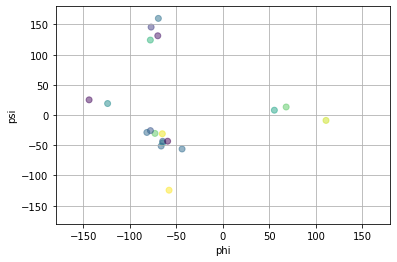

In [140]:
# Gráfico de Ramachandran
# Cristal
angles = pyt.multidihedral(nmr_strc, 'phi psi', resrange=range(20))

# take data for 'phi' and flatten to 1D array
phi = np.array([d.values for d in angles if 'phi' in d.key]).flatten()

# take data for 'psi' and flatten to 1D array
psi = np.array([d.values for d in angles if 'psi' in d.key]).flatten()

# setup color
colors = np.random.rand(len(psi))

plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.xlabel('phi')
plt.ylabel('psi')
plt.grid()
plt.scatter(phi, psi, alpha=0.5, c=colors)

In [114]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import  GRO, XTC
u = mda.Universe(GRO, XTC)

# selection of atomgroups
ags = [res.phi_selection() for res in u.residues[4:9]]

from MDAnalysis.analysis.dihedrals import Dihedral
R = Dihedral(ags).run()

*** ERROR ***
In order to run the MDAnalysis test cases you must install the
MDAnalysisTestData package (which has been separated from the 
library code itself since release 0.7.4). Go to 

     http://pypi.python.org/pypi/MDAnalysisTests

and download and install the `MDAnalysisTests-x.y.z.tar.gz'
that matches your MDAnalysis release.


ImportError: MDAnalysisTests package not installed.

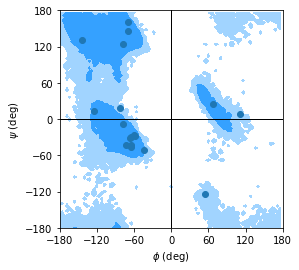

In [113]:
import matplotlib.pyplot as plt
from MDAnalysis.analysis.dihedrals import Ramachandran

u = mda.Universe('./dm_sources_1L2Y/5-traj_analysis/1l2y_Hs.psf',
               './dm_sources_1L2Y/5-traj_analysis/1l2y_Hs.pdb')
r = u.select_atoms("resid 2-19")

R = Ramachandran(r).run()
fig, ax = plt.subplots(figsize = plt.figaspect(1))
R.plot(ref = True)

AttributeError: 'Dihedral' object has no attribute 'plot'

In [98]:
u.trajectory[10]

< Timestep 10 with unit cell dimensions [ 0.  0.  0. 90. 90. 90.] >

In [95]:
dir(u)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_anchor_name',
 '_anchor_uuid',
 '_cache',
 '_class_bases',
 '_classes',
 '_fragdict',
 '_gen_anchor_hash',
 '_generate_from_topology',
 '_instant_selectors',
 '_kwargs',
 '_process_attr',
 '_topology',
 '_trajectory',
 'add_Residue',
 'add_Segment',
 'add_TopologyAttr',
 'anchor_name',
 'angles',
 'atoms',
 'bonds',
 'coord',
 'copy',
 'dihedrals',
 'dimensions',
 'empty',
 'filename',
 'impropers',
 'is_anchor',
 'kwargs',
 'load_new',
 'make_anchor',
 'remove_anchor',
 'residues',
 'segments',
 'select_atoms',
 'trajectory',
 'transfer_to_memory',
 'universe']